In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
from sklearn.linear_model import LogisticRegression #log regression

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score, fbeta_score
from sklearn.metrics import log_loss
from sklearn import metrics

from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTENC

from IPython.display import Image  
from six import StringIO  
import graphviz
import pydot 

In [48]:
ccdata = pd.read_csv('BankChurners.csv')
ccdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Preparation

In [49]:
#run once
ccdata.drop("CLIENTNUM",axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1,inplace=True)
ccdata.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1,inplace=True)

In [50]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [51]:
#run once
ccdata['Gender'].replace({'M':1,'F':0},inplace=True)
ccdata["Attrition_Flag"].replace({'Existing Customer':0,'Attrited Customer':1},inplace=True)

In [52]:
ccdata.keys()

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [53]:
features = list(ccdata.columns[1:])
features

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [54]:
#run once
#drop_first = True to avoid structural multicollinearity
ccdata2 = pd.get_dummies(data=ccdata,columns=['Education_Level','Marital_Status',"Income_Category",'Card_Category'],drop_first=True)
ccdata2.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

independent_vars = ccdata2.drop('Attrition_Flag', axis=1)
vif_data = pd.DataFrame()
vif_data['features'] = independent_vars.columns

vif_data["VIF"] = [variance_inflation_factor(independent_vars.values, i) 
                          for i in range(len(independent_vars.columns))] 

print(vif_data.sort_values(by='VIF',ascending=False))

                          features       VIF
8              Total_Ct_Chng_Q4_Q1  9.477268
22  Income_Category_Less than $40K  7.802301
2         Total_Relationship_Count  7.373715
6              Total_Revolving_Bal  6.867139
16          Marital_Status_Married  6.331980
3           Months_Inactive_12_mon  5.974674
9            Avg_Utilization_Ratio  5.866192
4            Contacts_Count_12_mon  5.705234
0                           Gender  5.606218
17           Marital_Status_Single  5.521689
5                     Credit_Limit  5.189503
1                  Dependent_count  4.101629
11        Education_Level_Graduate  3.814124
19     Income_Category_$40K - $60K  3.574653
7                  Total_Trans_Amt  3.164116
23         Income_Category_Unknown  2.973897
12     Education_Level_High School  2.805823
21    Income_Category_$80K - $120K  2.784731
20     Income_Category_$60K - $80K  2.748810
15         Education_Level_Unknown  2.357390
14      Education_Level_Uneducated  2.337557
18        

In [56]:
ccdata2.drop('Avg_Open_To_Buy',axis=1,inplace=True)

In [57]:
ccdata2.drop('Customer_Age',axis=1,inplace=True)

In [58]:
ccdata2.drop('Total_Trans_Ct',axis=1,inplace=True)

In [59]:
ccdata2.drop('Months_on_book',axis=1,inplace=True)

In [60]:
ccdata2.drop('Total_Amt_Chng_Q4_Q1',axis=1,inplace=True)

In [ ]:
#### vif done ####

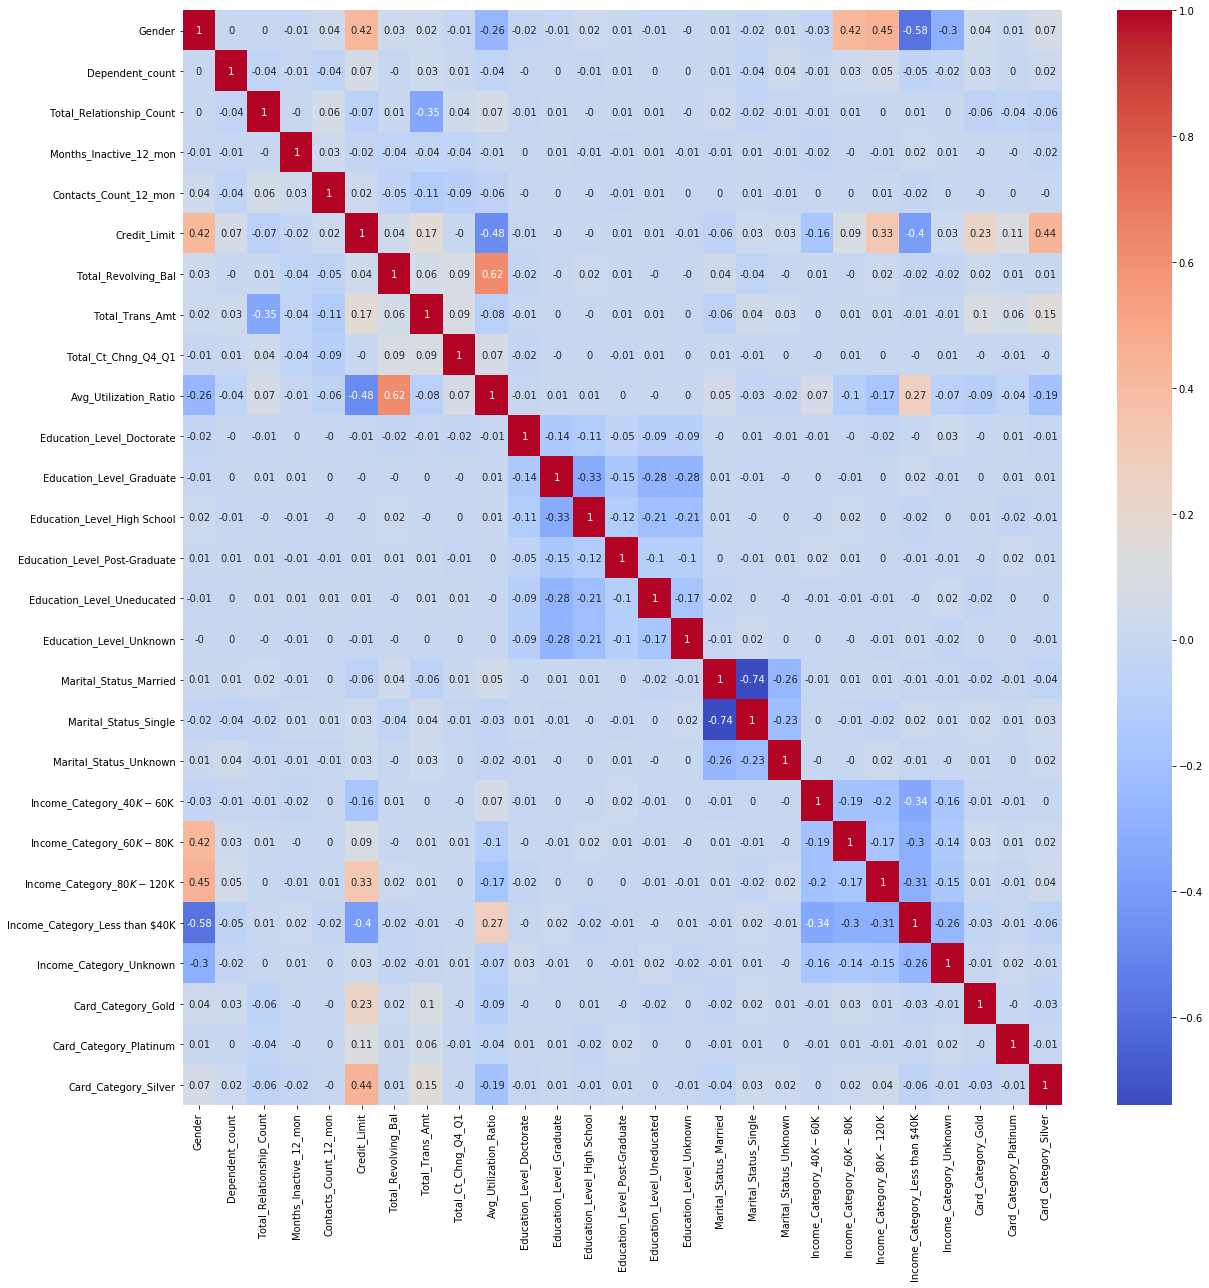

In [62]:
plt.figure(figsize=(18,18))
sns.heatmap(round(ccdata2.drop('Attrition_Flag',axis=1).corr(),2),annot=True,cmap='coolwarm')
plt.tight_layout()
#fields to consider removing (>0.5); Months_on_book(3), Total_Revolving_Bal(8),Avg_Open_to_Buy(9),Total_Trans_Amt(11),Total_Trans_Ct(12)

In [63]:
X = ccdata2.drop("Attrition_Flag",axis=1)
y = ccdata2['Attrition_Flag']

X

,Gender,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,3,5,1,3,12691.0,777,1144,1.625,0.061,...,0,0,0,1,0,0,0,0,0,0
1,0,5,6,1,2,8256.0,864,1291,3.714,0.105,...,1,0,0,0,0,1,0,0,0,0
2,1,3,4,1,0,3418.0,0,1887,2.333,0.000,...,0,0,0,0,1,0,0,0,0,0
3,0,4,3,4,1,3313.0,2517,1171,2.333,0.760,...,0,1,0,0,0,1,0,0,0,0
4,1,3,5,1,0,4716.0,0,816,2.500,0.000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,2,3,2,3,4003.0,1851,15476,0.857,0.462,...,1,0,1,0,0,0,0,0,0,0
10123,1,2,4,2,3,4277.0,2186,8764,0.683,0.511,...,0,0,1,0,0,0,0,0,0,0
10124,0,1,5,3,4,5409.0,0,10291,0.818,0.000,...,0,0,0,0,0,1,0,0,0,0
10125,1,2,4,3,3,5281.0,0,8395,0.722,0.000,...,0,1,1,0,0,0,0,0,0,0


In [64]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [66]:
def statslog_results(X_train,X_test,y_train,y_test):
    print('Logistic Regression Model Results\n')
    #model = LogisticRegression(C=0.615848211066026, penalty='l1', solver='saga')
    model = sm.Logit(y_train,X_train).fit()
    yhat = model.predict(X_test)
    logpreds = list(map(round, yhat))
    print(classification_report(y_test,logpreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,logpreds))
    #plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    #plt.show()
    print('Test Accuracy Score', accuracy_score(y_test,logpreds)*100,'%')
    print('Recall:',recall_score(y_test,logpreds)*100,'%')
    print('F2 Score:',round(fbeta_score(y_test, logpreds, beta=2.0)*100,2),'%\n')
    #print('The Training Accuracy is :',model.score(X_train,y_train))
    #print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    #pred_proba = model.predict_proba(X_train)
    #print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    #pred_proba_t = model.predict_proba(X_test)
    #print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n') 
    print(model.summary()) 

In [67]:
statslog_results(X_train,X_test,y_train,y_test)

Logistic Regression Model Results

Optimization terminated successfully.
         Current function value: 0.306532
         Iterations 7
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2551
           1       0.77      0.38      0.51       488

    accuracy                           0.88      3039
   macro avg       0.83      0.68      0.72      3039
weighted avg       0.87      0.88      0.86      3039

Confusion Matrix
 [[2497   54]
 [ 304  184]]
Test Accuracy Score 88.21980914774596 %
Recall: 37.704918032786885 %
F2 Score: 42.01 %

                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7061
Method:                           MLE   Df Model:                           26
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.3046
Time:   

## Hyperparameter Optimization

In [68]:
r_logmod = LogisticRegression()

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
logparam_grid = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': np.logspace(-4,4,20),
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter':[100,1000,2500]
    }
]

In [124]:
clf = GridSearchCV(r_logmod, param_grid = logparam_grid, cv = 5, verbose=True, n_jobs = -1)

In [125]:
best_clf = clf.fit(X_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.83930591 ...        nan 0.83930591 0.83930591]
  category=UserWarning


In [126]:
rawresults = pd.DataFrame(clf.cv_results_)
#rawresults

In [127]:
best_clf.best_estimator_

LogisticRegression(C=0.615848211066026, max_iter=2500, penalty='l1',
                   solver='liblinear')

In [93]:
best_clf.best_score_

0.8899545415183152

In [27]:
def log_results(X_train,X_test,y_train,y_test):
    print('Logistic Regression Model Results\n')
    #model = LogisticRegression(C=0.615848211066026, penalty='l1', solver='saga')
    model = LogisticRegression(C=0.615848211066026, max_iter=2500, penalty='l1',
                   solver='liblinear')
    model.fit(X_train,y_train)
    logpreds = model.predict(X_test)
    print(classification_report(y_test,logpreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,logpreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score', round(accuracy_score(y_test,logpreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,logpreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test,logpreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, logpreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n\n\n') 

In [69]:
cols_to_scale = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Trans_Amt','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale]) 

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

## Preliminary Testing (Pre-feature Selection)

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2551
           1       0.88      0.31      0.46       488

    accuracy                           0.88      3039
   macro avg       0.88      0.65      0.70      3039
weighted avg       0.88      0.88      0.86      3039

Confusion Matrix
 [[2531   20]
 [ 337  151]]


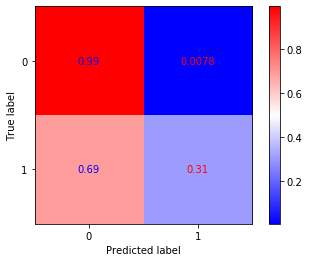

Accuracy Score 88.25 %
Recall: 30.94 %
Precision: 88.3 %
F2 Score: 35.56 %

The Training Accuracy is : 0.8896726862302483
The Testing Accuracy is : 0.8825271470878578
The log loss on training data is  0.30538949734544985
The log loss on testing data is  0.3212097020047703 





In [70]:
log_results(X_train,X_test,y_train,y_test)

In [71]:
#SMOTE uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTENC

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smotenc = SMOTENC(sampling_strategy='minority',categorical_features=[1,3,4,5,6,18,19]) 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm, y_sm = smotenc.fit_resample(X_train,y_train)

y_sm.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2551
           1       0.54      0.60      0.57       488

    accuracy                           0.85      3039
   macro avg       0.73      0.75      0.74      3039
weighted avg       0.86      0.85      0.86      3039

Confusion Matrix
 [[2299  252]
 [ 193  295]]


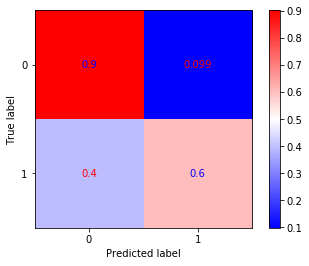

Accuracy Score 85.36 %
Recall: 60.45 %
Precision: 53.93 %
F2 Score: 59.02 %

The Training Accuracy is : 0.8277021348125735
The Testing Accuracy is : 0.85357025337282
The log loss on training data is  0.39278533328180104
The log loss on testing data is  0.3506435323016484 





In [72]:
log_results(X_sm,X_test,y_sm,y_test)

In [73]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train3, y_train3 = pipeline.fit_resample(X_train,y_train)
y_train3.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2551
           1       0.62      0.56      0.59       488

    accuracy                           0.87      3039
   macro avg       0.77      0.75      0.76      3039
weighted avg       0.87      0.87      0.87      3039

Confusion Matrix
 [[2386  165]
 [ 217  271]]


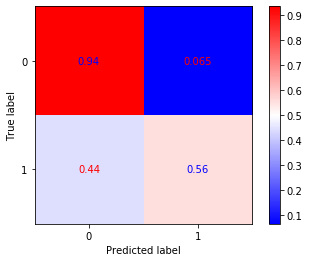

Accuracy Score 87.43 %
Recall: 55.53 %
Precision: 62.16 %
F2 Score: 56.74 %

The Training Accuracy is : 0.8105296343001261
The Testing Accuracy is : 0.8743007568279039
The log loss on training data is  0.4264363915591323
The log loss on testing data is  0.32650051290630044 





In [74]:
log_results(X_train3,X_test,y_train3,y_test)

## Post-feature selection

In [35]:
statslog_results(X_train,X_test,y_train,y_test)

Logistic Regression Model Results

Optimization terminated successfully.
         Current function value: 0.305678
         Iterations 7
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2551
           1       0.88      0.32      0.47       488

    accuracy                           0.88      3039
   macro avg       0.88      0.65      0.70      3039
weighted avg       0.88      0.88      0.86      3039

Confusion Matrix
 [[2530   21]
 [ 333  155]]
Test Accuracy Score 88.35143139190524 %
Recall: 31.762295081967213 %

                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                 7088
Model:                          Logit   Df Residuals:                     7061
Method:                           MLE   Df Model:                           26
Date:                Wed, 07 Apr 2021   Pseudo R-squ.:                  0.3066
Time:                     

In [76]:
#remove p-value greater than 0.5 (feature selection)
X_train2 = X_train.drop(['Gender','Credit_Limit','Income_Category_$60K - $80K','Avg_Utilization_Ratio','Marital_Status_Married','Income_Category_$40K - $60K','Income_Category_$80K - $120K','Income_Category_Unknown','Card_Category_Gold','Card_Category_Platinum','Card_Category_Silver'],axis = 1)
X_test2 = X_test.drop(['Gender','Credit_Limit','Income_Category_$60K - $80K','Avg_Utilization_Ratio','Marital_Status_Married','Income_Category_$40K - $60K','Income_Category_$80K - $120K','Income_Category_Unknown','Card_Category_Gold','Card_Category_Platinum','Card_Category_Silver'],axis = 1)

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2551
           1       0.89      0.32      0.47       488

    accuracy                           0.88      3039
   macro avg       0.89      0.65      0.70      3039
weighted avg       0.88      0.88      0.86      3039

Confusion Matrix
 [[2532   19]
 [ 334  154]]


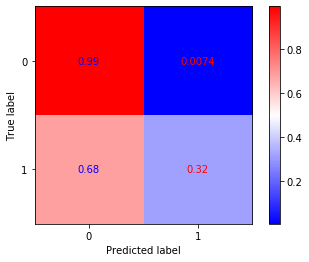

Accuracy Score 88.38 %
Recall: 31.56 %
Precision: 89.02 %
F2 Score: 36.24 %

The Training Accuracy is : 0.889813769751693
The Testing Accuracy is : 0.8838433695294505
The log loss on training data is  0.3064634372523242
The log loss on testing data is  0.32276032827177825 





In [77]:
log_results(X_train2,X_test2,y_train,y_test)

In [78]:
#SMOTE uses k-nearest neighbour algo to create synthetic samples 
#"Note - SMOTENC takes into consideration categorical and continuous variables"
from imblearn.over_sampling import SMOTE

#X= ccdata2.drop('Attrition_Flag',axis='columns')
#y= ccdata2['Attrition_Flag']
smote = SMOTE(sampling_strategy='minority') 
#samplingstrat specifies whether to use the minority or majority value for under/over-sampling
X_sm2, y_sm = smote.fit_resample(X_train2,y_train)

y_sm.value_counts()
#generate train test split first then do resampling only on training set

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2551
           1       0.54      0.65      0.59       488

    accuracy                           0.85      3039
   macro avg       0.73      0.77      0.75      3039
weighted avg       0.87      0.85      0.86      3039

Confusion Matrix
 [[2279  272]
 [ 170  318]]


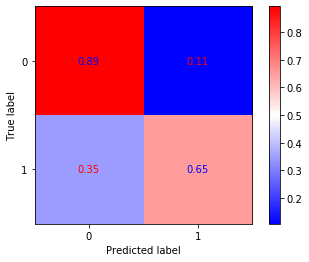

Accuracy Score 85.46 %
Recall: 65.16 %
Precision: 53.9 %
F2 Score: 62.55 %

The Training Accuracy is : 0.7967725668179526
The Testing Accuracy is : 0.8545574202040145
The log loss on training data is  0.44467590823489356
The log loss on testing data is  0.3576561004907877 





In [79]:
log_results(X_sm2,X_test2,y_sm,y_test)

In [80]:
##### With Pipeline Step resampling #####
over = BorderlineSMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

pipeline = Pipeline(steps=steps)
X_train4, y_train4 = pipeline.fit_resample(X_train2,y_train)
y_train4.value_counts()

0    3965
1    2379
Name: Attrition_Flag, dtype: int64

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2551
           1       0.62      0.55      0.59       488

    accuracy                           0.87      3039
   macro avg       0.77      0.74      0.76      3039
weighted avg       0.87      0.87      0.87      3039

Confusion Matrix
 [[2386  165]
 [ 218  270]]


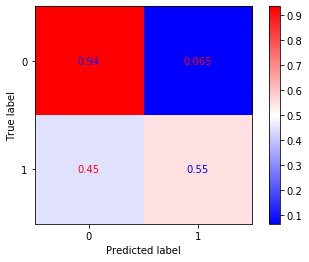

Accuracy Score 87.4 %
Recall: 55.33 %
Precision: 62.07 %
F2 Score: 56.56 %

The Training Accuracy is : 0.8064312736443884
The Testing Accuracy is : 0.8739717012175058
The log loss on training data is  0.4355432347515354
The log loss on testing data is  0.3263073255053569 





In [81]:
log_results(X_train4,X_test2,y_train4,y_test)

## Class weight rebalancing (Pre-feature selection)

In [82]:
def weighted_log_results(X_train,X_test,y_train,y_test):
    print('Logistic Regression Model Results\n')
    #model = LogisticRegression(C=0.615848211066026, penalty='l1', solver='saga')
    model = LogisticRegression(C=0.615848211066026, max_iter=2500, penalty='l1',
                   solver='liblinear',class_weight='balanced')
    model.fit(X_train,y_train)
    logpreds = model.predict(X_test)
    print(classification_report(y_test,logpreds))
    print('Confusion Matrix\n',confusion_matrix(y_test,logpreds))
    plot_confusion_matrix(model,X_test,y_test,normalize='true',cmap='bwr')
    plt.show()
    print('Accuracy Score', round(accuracy_score(y_test,logpreds)*100,2),'%')
    print('Recall:',round(recall_score(y_test,logpreds)*100,2),'%')
    print('Precision:',round(precision_score(y_test,logpreds)*100,2),'%')
    print('F2 Score:',round(fbeta_score(y_test, logpreds, beta=2.0)*100,2),'%\n')
    print('The Training Accuracy is :',model.score(X_train,y_train))
    print('The Testing Accuracy is :', model.score(X_test,y_test))
    #running log loss on training data
    pred_proba = model.predict_proba(X_train)
    print('The log loss on training data is ',log_loss(y_train,pred_proba))
    #running log loss on testing data
    pred_proba_t = model.predict_proba(X_test)
    print('The log loss on testing data is ',log_loss(y_test,pred_proba_t),'\n\n\n') 

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2551
           1       0.49      0.66      0.56       488

    accuracy                           0.84      3039
   macro avg       0.71      0.77      0.73      3039
weighted avg       0.86      0.84      0.84      3039

Confusion Matrix
 [[2215  336]
 [ 165  323]]


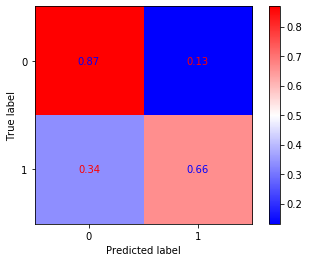

Accuracy Score 83.51 %
Recall: 66.19 %
Precision: 49.01 %
F2 Score: 61.85 %

The Training Accuracy is : 0.7772291196388262
The Testing Accuracy is : 0.8351431391905232
The log loss on training data is  0.465300740188777
The log loss on testing data is  0.38378808590687974 





In [83]:
weighted_log_results(X_train,X_test,y_train,y_test)

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2551
           1       0.54      0.60      0.57       488

    accuracy                           0.85      3039
   macro avg       0.73      0.75      0.74      3039
weighted avg       0.86      0.85      0.86      3039

Confusion Matrix
 [[2299  252]
 [ 193  295]]


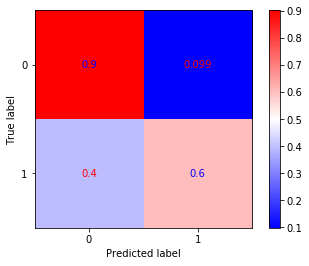

Accuracy Score 85.36 %
Recall: 60.45 %
Precision: 53.93 %
F2 Score: 59.02 %

The Training Accuracy is : 0.8275340393343419
The Testing Accuracy is : 0.85357025337282
The log loss on training data is  0.39278363442646647
The log loss on testing data is  0.35063050359425035 





In [84]:
weighted_log_results(X_sm,X_test,y_sm,y_test)

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2551
           1       0.50      0.64      0.56       488

    accuracy                           0.84      3039
   macro avg       0.71      0.76      0.73      3039
weighted avg       0.86      0.84      0.85      3039

Confusion Matrix
 [[2238  313]
 [ 176  312]]


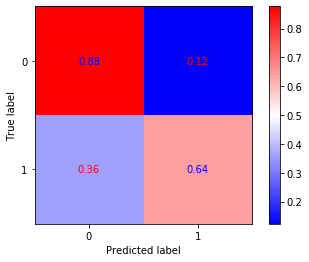

Accuracy Score 83.91 %
Recall: 63.93 %
Precision: 49.92 %
F2 Score: 60.54 %

The Training Accuracy is : 0.7930327868852459
The Testing Accuracy is : 0.8390918065153011
The log loss on training data is  0.4450891666013254
The log loss on testing data is  0.3733300860960103 





In [85]:
weighted_log_results(X_train3,X_test,y_train3,y_test)

## Class weight rebalancing (Post-feature selection)

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      2551
           1       0.50      0.65      0.56       488

    accuracy                           0.84      3039
   macro avg       0.71      0.76      0.73      3039
weighted avg       0.86      0.84      0.85      3039

Confusion Matrix
 [[2236  315]
 [ 172  316]]


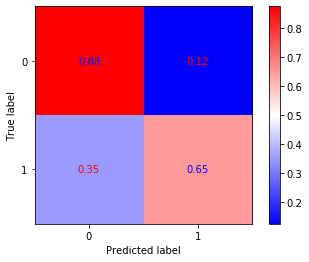

Accuracy Score 83.97 %
Recall: 64.75 %
Precision: 50.08 %
F2 Score: 61.17 %

The Training Accuracy is : 0.7775112866817155
The Testing Accuracy is : 0.8397499177360974
The log loss on training data is  0.4667937385146614
The log loss on testing data is  0.3821613161794351 





In [86]:
weighted_log_results(X_train2,X_test2,y_train,y_test)

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2551
           1       0.54      0.65      0.59       488

    accuracy                           0.85      3039
   macro avg       0.73      0.77      0.75      3039
weighted avg       0.87      0.85      0.86      3039

Confusion Matrix
 [[2279  272]
 [ 170  318]]


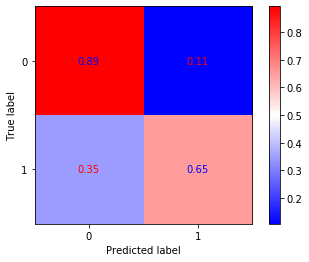

Accuracy Score 85.46 %
Recall: 65.16 %
Precision: 53.9 %
F2 Score: 62.55 %

The Training Accuracy is : 0.7967725668179526
The Testing Accuracy is : 0.8545574202040145
The log loss on training data is  0.44467586445923263
The log loss on testing data is  0.3576553703653663 





In [87]:
weighted_log_results(X_sm2,X_test2,y_sm,y_test)

Logistic Regression Model Results

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      2551
           1       0.52      0.65      0.57       488

    accuracy                           0.85      3039
   macro avg       0.72      0.76      0.74      3039
weighted avg       0.86      0.85      0.85      3039

Confusion Matrix
 [[2255  296]
 [ 173  315]]


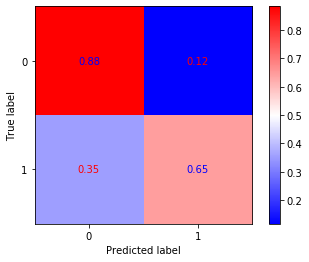

Accuracy Score 84.57 %
Recall: 64.55 %
Precision: 51.55 %
F2 Score: 61.45 %

The Training Accuracy is : 0.7887767969735183
The Testing Accuracy is : 0.8456729187232642
The log loss on training data is  0.4546333161616973
The log loss on testing data is  0.37004611161057294 





In [88]:
weighted_log_results(X_train4,X_test2,y_train4,y_test)